<img src="http://cliparts.co/cliparts/6iy/oBb/6iyoBbdpT.gif"/>

# Human Resources Analytics - Milestone Report

** "You don't build a business. You build people, and people build the business." - Zig Ziglar**
***

<img src="https://static1.squarespace.com/static/5144a1bde4b033f38036b7b9/t/56ab72ebbe7b96fafe9303f5/1454076676264/"/>

## Objective
***
*The goal is to understand what factors contribute most to employee turnover and create a model that can predict if a certain employee will leave the company or not.*

## OSEMN Pipeline
****

*We are following a typical data science pipeline, which is call “OSEMN” (pronounced awesome).*

1. **O**btaining the data is the first approach in solving the problem.

2. **S**crubbing or cleaning the data is the next step. This includes data imputation of missing or invalid data and fixing column names.

3. **E**xploring the data will follow right after and allow further insight of what our dataset contains. Looking for any outliers or weird data. Understanding the relationship each explanatory variable has with the response variable resides here and we can do this with a correlation matrix. 

4. **M**odeling the data will give us our predictive power on whether an employee will leave. 

5. I**N**terpreting the data is last. With all the results and analysis of the data, what conclusion is made? What factors contributed most to employee turnover? What relationship of variables were found? 


# Part 1: Obtaining the Data 
***

In [39]:
# Import the neccessary modules for data manipulation and visual representation
import numpy as np # Data arrays made easy
import pandas as pd # Data tables made easy with Pandas

import matplotlib.pyplot as plt # For graph
import matplotlib as matplot # For graph
import seaborn as sns # For data visualization
# Built-in magic command function for displaying graph inline 
%matplotlib inline 
print('Importing libraries successful.')

Importing libraries successful.


In [40]:
#Read the analytics csv file and store our dataset into a dataframe called "df"
df = pd.DataFrame.from_csv('HR_comma_sep.csv', index_col=None)
#index_col defines which column in the data is to be considered as the index column (default is 0)
#in our case we make it None.
print('DataFrame created')

DataFrame created


> # Part 2: Scrubbing the Data 
***

In [41]:
# Check to see if there are any missing values in our data set
# Check for any blank columns in the data
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [42]:
# Get a quick overview of what we are dealing with in our dataset
#Use df.head(n) default n=5
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [43]:
# Renaming certain columns for better readability
# Can rename the columns in this way
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })
print('Column rename done')
df.head() #Display 5 rows

Column rename done


,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [44]:
# Move the reponse variable "turnover" to the front of the table
front = df['turnover'] #Creating a data column from df['turnover']
df.drop(labels=['turnover'], axis=1, inplace=True) # axis=1 means that we are referring to col and not row 
#inplace = True means you are not assigning the df to another df it is done inplace
df.insert(0, 'turnover', front)
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


# Part 3: Exploring the Data
*** 
 <img  src="https://s-media-cache-ak0.pinimg.com/originals/32/ef/23/32ef2383a36df04a065b909ee0ac8688.gif"/>

In [45]:
# The dataset contains 10 columns and 14999 observations
df.shape

(14999, 10)

In [46]:
# Check the type of our features. 
df.dtypes

turnover                 int64
satisfaction           float64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
promotion                int64
department              object
salary                  object
dtype: object

In [47]:
# Looks like about 76% of employees stayed and 24% of employees left. 
# NOTE: When performing cross validation, its important to maintain this turnover ratio
#value_counts() calculates the frequency of an element
turnover_rate = df.turnover.value_counts() / 14999
turnover_rate

0    0.761917
1    0.238083
Name: turnover, dtype: float64

In [48]:
# Display the statistical overview of the employees
df.describe()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [49]:
# Overview of summary (Turnover V.S. Non-turnover)
turnover_Summary = df.groupby('turnover')
turnover_Summary.mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


##  3a. Statistical Overview From Data Exploring
***
The dataset has:
 - About 15,000 employee observations and 10 features 
 - The company had a turnover rate of about 24%
 - Mean satisfaction of employees is 0.61

##  3b. Correlation Matrix & Heatmap
***
**Moderate Positively Correlated Features:** 
- projectCount vs evaluation: 0.349333
- projectCount vs averageMonthlyHours:  0.417211
- averageMonthlyHours vs evaluation: 0.339742

**Moderate Negatively Correlated Feature:**
 - satisfaction vs turnover:  -0.388375

**Stop and Think:**
- What features affect our target variable the most (turnover)?
- What features have strong correlations with each other?
- Can we do a more in depth examination of these features?

**Summary:**

From the heatmap, there is a **positive(+)** correlation between projectCount, averageMonthlyHours, and evaluation. Which could mean that the employees who spent more hours and did more projects were evaluated highly. 

For the **negative(-)** relationships, turnover and satisfaction are highly correlated. I'm assuming that people tend to leave a company more when they are less satisfied. 

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,1.000000,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788
satisfaction,-0.388375,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
evaluation,0.006567,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
projectCount,0.023787,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
averageMonthlyHours,0.071287,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
yearsAtCompany,0.144822,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
workAccident,-0.154622,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
promotion,-0.061788,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


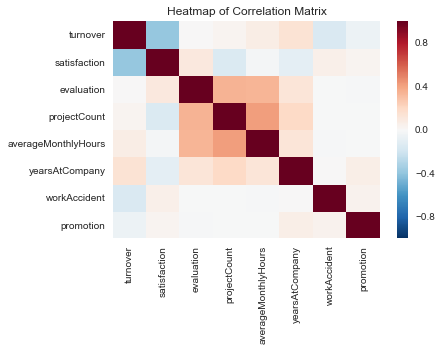

In [50]:
#Correlation Matrix
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.title('Heatmap of Correlation Matrix')
corr

## 3b2. Statistical Test for Correlation
***

### One-Sample T-Test (Measuring Satisfaction Level)
A one-sample t-test checks whether a sample mean differs from the population mean. Let's test to see whether the average satisfaction level of employees that had a turnover differs from the entire employee population.

**Hypothesis Testing:** Is there significant difference in the **means of satisfaction level** between employees who had a turnover and the entire employee population?

 - **Null Hypothesis:** *(H0: pTS = pES)* The null hypothesis would be that there is **no** difference in satisfaction level between employees who did turnover and the entire employee population.

 - **Alternate Hypothesis:** *(HA: pTS != pES)* The alternative hypothesis would be that there **is** a difference in satisfaction level between employees who did turnover and the entire employee population.

In [51]:
# Let's compare the means of our employee turnover satisfaction against the employee population satisfaction
'''
Signal/Noise = difference between group means/variability of group
=|x1-x2|/sqrt[(((s1)**2)/n1)+(((s2)**2)/n2)]
x1 and x2 are means
'''

emp_population_satisfaction = df['satisfaction'].mean()
emp_turnover_satisfaction = df[df['turnover']==1]['satisfaction'].mean()


print( 'The mean for the employee population is: ' + str(emp_population_satisfaction) )
print( 'The mean for the employees that had a turnover is: ' + str(emp_turnover_satisfaction) )

The mean for the employee population is: 0.6128335222348166
The mean for the employees that had a turnover is: 0.44009801176140917


### Conducting the T-Test
***
Let's conduct a t-test at **95% confidence level** and see if it correctly rejects the null hypothesis that the sample comes from the same distribution as the employee population. To conduct a one sample t-test, we can use the **stats.ttest_1samp()** function:

In [52]:
#scipy is used for statistics
import scipy.stats as stats
stats.ttest_1samp(a=  df[df['turnover']==1]['satisfaction'], # Sample of Employee satisfaction who had a Turnover
                  popmean = emp_population_satisfaction)  # Employee Population satisfaction mean

Ttest_1sampResult(statistic=-39.109488943484457, pvalue=9.012781195378076e-279)

# Normal distribution:

<img width="500px" height="500px" src="https://upload.wikimedia.org/wikipedia/commons/a/a9/Empirical_Rule.PNG">

In [53]:
degree_freedom = len(df[df['turnover']==1])
LQ = stats.t.ppf(0.025,degree_freedom)  # Left Quartile
RQ = stats.t.ppf(0.975,degree_freedom)  # Right Quartile
print ('The t-distribution left quartile range is: ' + str(LQ))
print ('The t-distribution right quartile range is: ' + str(RQ))


The t-distribution left quartile range is: -1.9606285216
The t-distribution right quartile range is: 1.9606285216


### One-Sample T-Test Summary
***
#### **T-Test = -39.109**       |        **P-Value = 9.01e-279**       |       **Reject Null Hypothesis**

**Reject the null hypothesis because:**
 - T-Test score is outside the quantiles
 - P-value is lower than confidence level of 5%
 
### Therefore, it is hypothesis that Low satisfaction level is one of the main reason for turnover.


Based on the statistical analysis of a one sample t-test, there seems to be some significant difference between the mean satisfaction of employees who had a turnover and the entire employee population. The super low P-value of **9.012e-279** at a 5% confidence level is a good indicator to **reject the null hypothesis**. 

But this does not neccessarily mean that there is practical significance. We would have to conduct more experiments or maybe collect more data about the employees in order to come up with a more accurate finding.

<img src="https://static1.squarespace.com/static/5144a1bde4b033f38036b7b9/t/56714b05c647ad9f555348fa/1450265419456/PresentWIP.gif?format=500w"/>

##  3c. Salary V.S. Turnover
***
**Summary:** This is not unusual. Here's what I found:
 - Majority of employees who left either had **low** or **medium** salary.
 - Barely any employees left with **high** salary
 - Employees with low to average salaries tend to leave the company.
 
**Stop and Think:** 
 - What is the work environment like for low, medium, and high salaries?
 - What made employees with high salaries to leave?

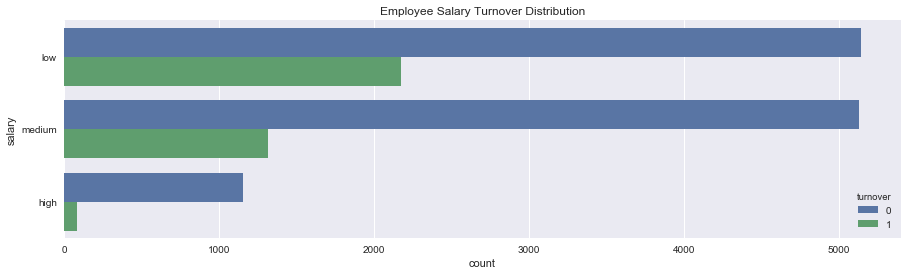

In [54]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='turnover', data=df).set_title('Employee Salary Turnover Distribution');

<img src="https://cdn.dribbble.com/users/20727/screenshots/2118641/video-producer-motion-graphics-designer-animator-jobs-manchester-uk.gif"/>

##  3d. Department V.S. Turnover 
***
**Summary:** Let's see more information about the departments. Here's what I found:
 - The **sales, technical, and support department** were the top 3 departments to have employee turnover
 - The management department had the smallest amount of turnover
 
**Stop and Think:** 
 - If we had more information on each department, can we pinpoint a more direct cause for employee turnover?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

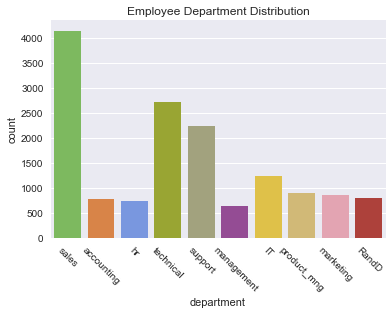

In [55]:
# Employee distri
# Types of colors
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='department', data=df, palette=color_types).set_title('Employee Department Distribution');
 
# Rotate x-labels
plt.xticks(rotation=-45)

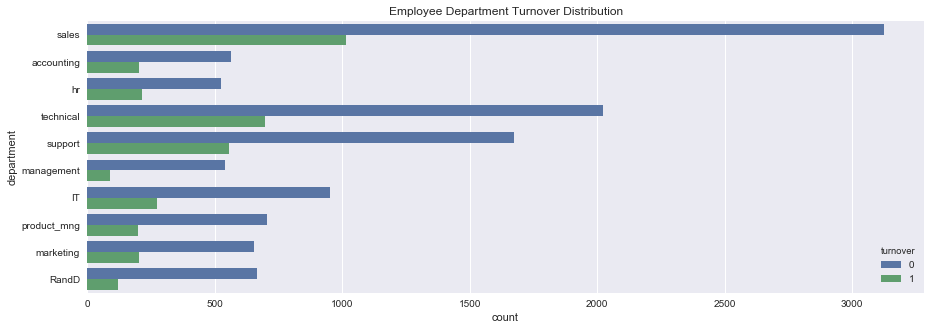

In [56]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="department", hue='turnover', data=df).set_title('Employee Department Turnover Distribution');

##  3e. Turnover V.S. ProjectCount 
***
**Summary:** This graph is quite interesting as well. Here's what I found:
 - More than half of the employees with **2,6, and 7** projects left the company
 - Majority of the employees who did not leave the company had **3,4, and 5** projects
 - All of the employees with **7** projects left the company
 - There is an increase in employee turnover rate as project count increases
 
**Stop and Think:** 
 - Why are employees leaving at the lower/higher spectrum of project counts?
 - Does this means that employees with project counts 2 or less are not worked hard enough or are not highly valued, thus leaving the company?
 - Do employees with 6+ projects are getting overworked, thus leaving the company?

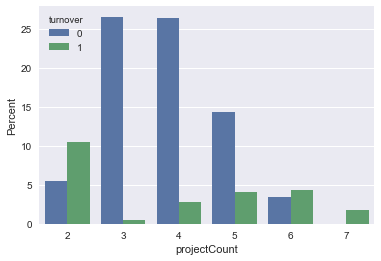

In [57]:
ax = sns.barplot(x="projectCount", y="projectCount", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

##  3f. Turnover V.S. YearsAtCompany 
***
**Summary:** Let's see if theres a point where employees start leaving the company. Here's what I found:
 - More than half of the employees with **4 and 5** years left the company
 - Employees with **5** years should **highly** be looked into 
 
**Stop and Think:** 
 - Why are employees leaving mostly at the **3-5** year range?
 - Who are these employees that left?
 - Are these employees part-time or contractors? 

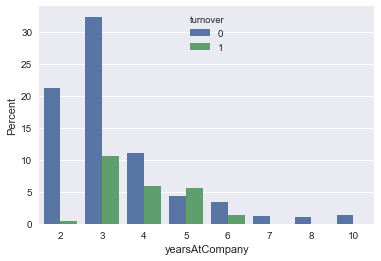

In [58]:
ax = sns.barplot(x="yearsAtCompany", y="yearsAtCompany", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

##  3g. Turnover V.S. Evaluation 
***
**Summary:** 
 - There is a biomodal distribution for those that had a turnover. 
 - Employees with **low** performance tend to leave the company more
 - Employees with **high** performance tend to leave the company more
 - The **sweet spot** for employees that stayed is within **0.6-0.8** evaluation

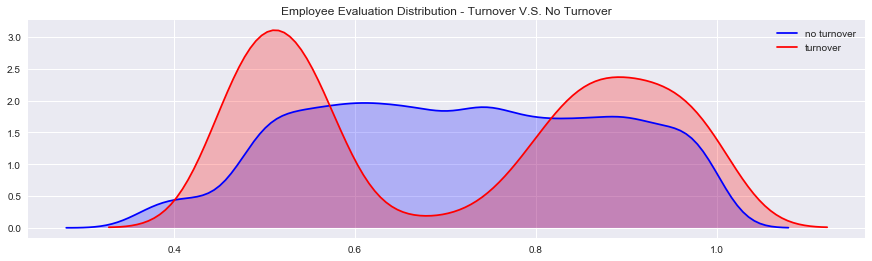

In [59]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'evaluation'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'evaluation'] , color='r',shade=True, label='turnover')
plt.title('Employee Evaluation Distribution - Turnover V.S. No Turnover')

##  3h. Turnover V.S. AverageMonthlyHours 
***
**Summary:** 
 - Another bi-modal distribution for employees that turnovered 
 - Employees who had less hours of work **(~150hours or less)** left the company more
 - Employees who had too many hours of work **(~250 or more)** left the company 
 - Employees who left generally were **underworked** or **overworked**.

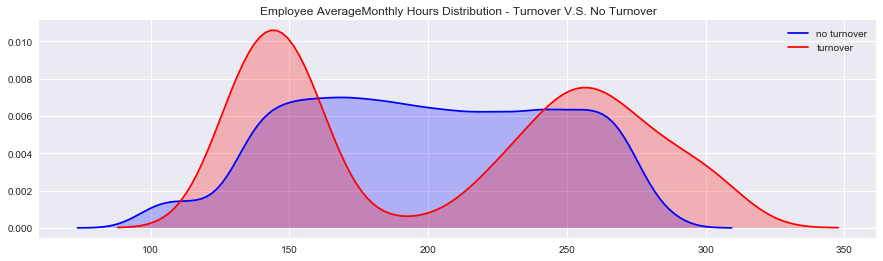

In [60]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'averageMonthlyHours'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'averageMonthlyHours'] , color='r',shade=True, label='turnover')
plt.title('Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

##  3i. Turnover V.S. Satisfaction 
***
**Summary:** 
 - There is a **tri-modal** distribution for employees that turnovered
 - Employees who had really low satisfaction levels **(0.2 or less)** left the company more
 - Employees who had low satisfaction levels **(0.3~0.5)** left the company more
 - Employees who had really high satisfaction levels **(0.7 or more)** left the company more

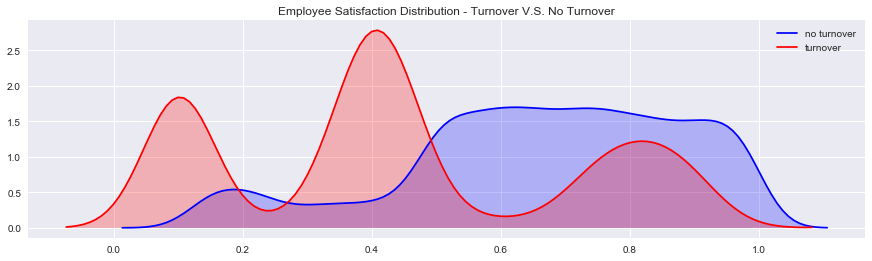

In [61]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'satisfaction'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'satisfaction'] , color='r',shade=True, label='turnover')
plt.title('Employee Satisfaction Distribution - Turnover V.S. No Turnover')

##  3j. Distribution Plots (Satisfaction - Evaluation - AverageMonthlyHours)
***
**Summary:** Let's examine the distribution on some of the employee's features. Here's what I found:
 - **Satisfaction** - There is a huge spike for employees with low satisfaction and high satisfaction.
 - **Evaluation** - There is a bimodal distrubtion of employees for low evaluations (less than 0.6) and high evaluations (more than 0.8)
 - **AverageMonthlyHours** - There is another bimodal distribution of employees with lower and higher average monthly hours (less than 150 hours & more than 250 hours)
 - The evaluation and average monthly hour graphs both share a similar distribution. 
 - Employees with lower average monthly hours were evaluated less and vice versa.
 - If you look back at the correlation matrix, the high correlation between evaluation and averageMonthlyHours does support this finding.
 
**Stop and Think:** 
 - Is there a reason for the high spike in low satisfaction of employees?
 - Could employees be grouped in a way with these features?
 - Is there a correlation between evaluation and averageMonthlyHours?

##  3k. ProjectCount VS AverageMonthlyHours 
***

**Summary:**
 - As project count increased, so did average monthly hours
 - Something weird about the boxplot graph is the difference in averageMonthlyHours between people who had a turnver and did not. 
 - Looks like employees who **did not** have a turnover had **consistent** averageMonthlyHours, despite the increase in projects
 - In contrast, employees who **did** have a turnover had an increase in averageMonthlyHours with the increase in projects

**Stop and Think:** 
 - What could be the meaning for this? 
 - **Why is it that employees who left worked more hours than employees who didn't, even with the same project count?**

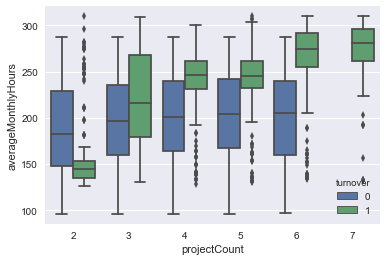

In [62]:
#ProjectCount VS AverageMonthlyHours [BOXPLOT]
#Looks like the average employees who stayed worked about 200hours/month. Those that had a turnover worked about 250hours/month and 150hours/month

import seaborn as sns
sns.boxplot(x="projectCount", y="averageMonthlyHours", hue="turnover", data=df)

##  3l. ProjectCount VS Evaluation
***
**Summary:** This graph looks very similar to the graph above. What I find strange with this graph is with the turnover group. There is an increase in evaluation for employees who did more projects within the turnover group. But, again for the non-turnover group, employees here had a consistent evaluation score despite the increase in project counts. 

**Questions to think about:**
 - **Why is it that employees who left, had on average, a higher evaluation than employees who did not leave, even with an increase in project count? **
 - Shouldn't employees with lower evaluations tend to leave the company more? 

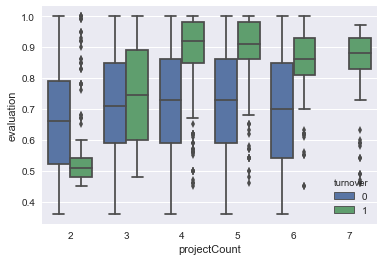

In [63]:
#ProjectCount VS Evaluation
#Looks like employees who did not leave the company had an average evaluation of around 70% even with different projectCounts
#There is a huge skew in employees who had a turnover though. It drastically changes after 3 projectCounts. 
#Employees that had two projects and a horrible evaluation left. Employees with more than 3 projects and super high evaluations left
import seaborn as sns
sns.boxplot(x="projectCount", y="evaluation", hue="turnover", data=df)

##  3m. Satisfaction VS Evaluation
***
**Summary:** This is by far the most compelling graph. This is what I found:
 - There are **3** distinct clusters for employees who left the company
 
**Cluster 1 (Hard-working and Sad Employee):** Satisfaction was below 0.2 and evaluations were greater than 0.75. Which could be a good indication that employees who left the company were good workers but felt horrible at their job. 
 - **Question:** What could be the reason for feeling so horrible when you are highly evaluated? Could it be working too hard? Could this cluster mean employees who are "overworked"?

**Cluster 2 (Bad and Sad Employee):** Satisfaction between about 0.35~0.45 and evaluations below ~0.58. This could be seen as employees who were badly evaluated and felt bad at work.
 - **Question:** Could this cluster mean employees who "under-performed"?

**Cluster 3 (Hard-working and Happy Employee):** Satisfaction between 0.7~1.0 and evaluations were greater than 0.8. Which could mean that employees in this cluster were "ideal". They loved their work and were evaluated highly for their performance. 
 - **Question:** Could this cluser mean that employees left because they found another job opportunity?

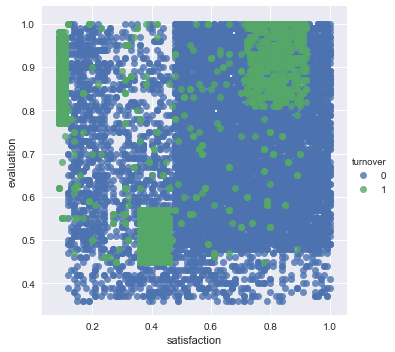

In [64]:
sns.lmplot(x='satisfaction', y='evaluation', data=df,
           fit_reg=False, # No regression line
           hue='turnover')   # Color by evolution stage

## 3n. K-Means Clustering of Employee Turnover
***
**Cluster 1 (Blue):** Hard-working and Sad Employees

**Cluster 2 (Red):** Bad and Sad Employee 

**Cluster 3 (Green):** Hard-working and Happy Employee 

**Clustering PROBLEM:**
    - How do we know that there are "3" clusters?
    - We would need expert domain knowledge to classify the right amount of clusters
    - Hidden uknown structures could be present

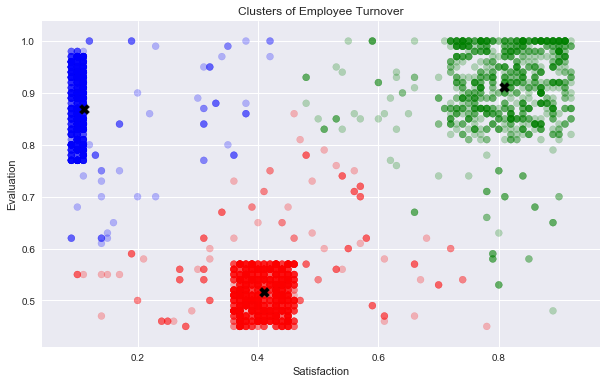

In [66]:
# Import KMeans Model
from sklearn.cluster import KMeans

# Graph and create 3 clusters of Employee Turnover
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(df[df.turnover==1][["satisfaction","evaluation"]])

kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="satisfaction",y="evaluation", data=df[df.turnover==1],
            alpha=0.25,color = kmeans_colors)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.show()

1.0 1.0
The evaluation and satisfaction of employees who left the company : 1.0 0.9110000000000001


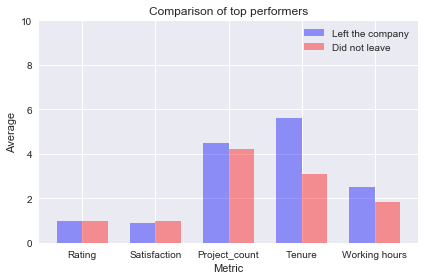

In [68]:
df_turnover_1=df[df['turnover']==1].sort_values(['evaluation','satisfaction'],ascending=False)
df_turnover_0=df[df['turnover']==0].sort_values(['evaluation','satisfaction'],ascending=False)


#x=df_turnover_0['averageMonthlyHours'].head(10)
#y=df_turnover_1['averageMonthlyHours'].head(10)


eval_1=df_turnover_1['evaluation'].head(10).mean()
sat_1=df_turnover_1['satisfaction'].head(10).mean()
pc_1=df_turnover_1['projectCount'].head(10).mean()
yac_1=df_turnover_1['yearsAtCompany'].head(10).mean()
y=df_turnover_1['averageMonthlyHours'].head(10).mean()/100


eval_0=df_turnover_0['evaluation'].head(10).mean()
sat_0=df_turnover_0['satisfaction'].head(10).mean()
pc_0=df_turnover_0['projectCount'].head(10).mean()
yac_0=df_turnover_0['yearsAtCompany'].head(10).mean()
x=df_turnover_0['averageMonthlyHours'].head(10).mean()/100



print(eval_0,eval_1)

arr_1=[eval_1,sat_1,pc_1,yac_1,y]
arr_0=[eval_0,sat_0,pc_0,yac_0,x]






print('The evaluation and satisfaction of employees who left the company :',eval_1,sat_1)

index = np.arange(5)

fig, ax = plt.subplots()

#index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, arr_1, bar_width,
                 alpha=opacity,
                 color='b',

                 error_kw=error_config,
                 label='Left the company')

rects2 = plt.bar(index + bar_width, arr_0, bar_width,
                 alpha=opacity,
                 color='r',
                 error_kw=error_config,
                 label='Did not leave')

plt.ylim([0,10])
plt.xlabel('Metric')
plt.ylabel('Average')
plt.title('Comparison of top performers')
plt.xticks(index + bar_width / 2, ('Rating', 'Satisfaction', 'Project_count', 'Tenure', 'Working hours'))
plt.legend()
plt.tight_layout()
plt.show()


The evaluation and satisfaction of employees who left the company : 1.0 0.9110000000000001


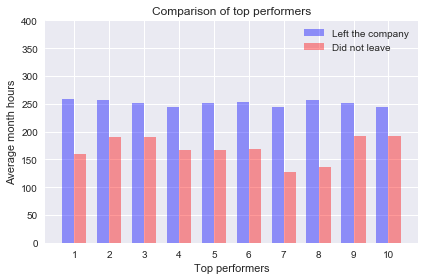

In [67]:
df_turnover_1=df[df['turnover']==1].sort_values(['evaluation','satisfaction'],ascending=False)
df_turnover_0=df[df['turnover']==0].sort_values(['evaluation','satisfaction'],ascending=True)


x=df_turnover_0['averageMonthlyHours'].head(10)
y=df_turnover_1['averageMonthlyHours'].head(10)


eval_1=df_turnover_1['evaluation'].head(10).mean()
sat_1=df_turnover_1['satisfaction'].head(10).mean()

print('The evaluation and satisfaction of employees who left the company :',eval_1,sat_1)

index = np.arange(10)

fig, ax = plt.subplots()

#index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, y, bar_width,
                 alpha=opacity,
                 color='b',

                 error_kw=error_config,
                 label='Left the company')

rects2 = plt.bar(index + bar_width, x, bar_width,
                 alpha=opacity,
                 color='r',
                 error_kw=error_config,
                 label='Did not leave')

plt.ylim([0,400])
plt.xlabel('Top performers')
plt.ylabel('Average month hours')
plt.title('Comparison of top performers')
plt.xticks(index + bar_width / 2, ('1', '2', '3', '4', '5','6','7','8','9','10'))
plt.legend()
plt.tight_layout()
plt.show()



<img src="http://i68.tinypic.com/qsts7k.jpg"/>

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler

# Create dummy variables for the 'department' and 'salary' features, since they are categorical 
department = pd.get_dummies(data=df['department'],drop_first=True,prefix='dep') #drop first column to avoid dummy trap
salary = pd.get_dummies(data=df['salary'],drop_first=True,prefix='sal')
df.drop(['department','salary'],axis=1,inplace=True)
df = pd.concat([df,department,salary],axis=1)

In [70]:
# Create base rate model
def base_rate_model(X) :
    y = np.zeros(X.shape[0])
    return y


In [71]:
# Create train and test splits
target_name = 'turnover'
X = df.drop('turnover', axis=1)
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(X)
y=df[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=123, stratify=y)

In [72]:
# Check accuracy of base rate model
y_base_rate = base_rate_model(X_test)
from sklearn.metrics import accuracy_score
print ("Base rate accuracy is %2.2f" % accuracy_score(y_test, y_base_rate))

Base rate accuracy is 0.76


In [73]:
# Check accuracy of Logistic Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=1)

model.fit(X_train, y_train)
print ("Logistic accuracy is %2.2f" % accuracy_score(y_test, model.predict(X_test)))

Logistic accuracy is 0.80


In [74]:
# Using 10 fold Cross-Validation to train our Logistic Regression Model
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression(class_weight = "balanced")
scoring = 'roc_auc'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.827 (0.014)


In [75]:
# Compare the Logistic Regression Model V.S. Base Rate Model V.S. Random Forest Model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier


print ("---Base Model---")
base_roc_auc = roc_auc_score(y_test, base_rate_model(X_test))
print ("Base Rate AUC = %2.2f" % base_roc_auc)
print(classification_report(y_test, base_rate_model(X_test)))

# NOTE: By adding in "class_weight = balanced", the Logistic Auc increased by about 10%! This adjusts the threshold value
logis = LogisticRegression(class_weight = "balanced")
logis.fit(X_train, y_train)
print ("\n\n ---Logistic Model---")
logit_roc_auc = roc_auc_score(y_test, logis.predict(X_test))
print ("Logistic AUC = %2.2f" % logit_roc_auc)
print(classification_report(y_test, logis.predict(X_test)))

# Random Forest Model
rf = RandomForestClassifier(
    n_estimators=1000, 
    max_depth=None, 
    min_samples_split=10, 
    class_weight="balanced"
    #min_weight_fraction_leaf=0.02 
    )
rf.fit(X_train, y_train)
print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))


# Ada Boost
ada = AdaBoostClassifier(n_estimators=1000, learning_rate=0.1)
ada.fit(X_train,y_train)
print ("\n\n ---AdaBoost Model---")
ada_roc_auc = roc_auc_score(y_test, ada.predict(X_test))
print ("AdaBoost AUC = %2.2f" % ada_roc_auc)
print(classification_report(y_test, ada.predict(X_test)))

---Base Model---
Base Rate AUC = 0.50
             precision    recall  f1-score   support

          0       0.76      1.00      0.86      2857
          1       0.00      0.00      0.00       893

avg / total       0.58      0.76      0.66      3750



 ---Logistic Model---
Logistic AUC = 0.78
             precision    recall  f1-score   support

          0       0.93      0.76      0.83      2857
          1       0.51      0.81      0.62       893

avg / total       0.83      0.77      0.78      3750



C:\Users\soura\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)




 ---Random Forest Model---
Random Forest AUC = 0.97
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      2857
          1       0.99      0.95      0.97       893

avg / total       0.99      0.99      0.99      3750



 ---AdaBoost Model---
AdaBoost AUC = 0.94
             precision    recall  f1-score   support

          0       0.97      0.97      0.97      2857
          1       0.91      0.91      0.91       893

avg / total       0.96      0.96      0.96      3750



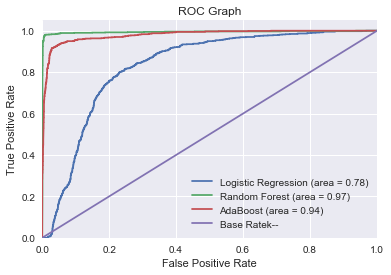

In [77]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logis.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
ada_fpr, ada_tpr, ada_thresholds = roc_curve(y_test, ada.predict_proba(X_test)[:,1])

plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

# Plot AdaBoost ROC
plt.plot(ada_fpr, ada_tpr, label='AdaBoost (area = %0.2f)' % ada_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

# 5. Interpreting the Data
***

**Summary:** 
With all of this information, this is what Bob should know about his company and why his employees probably left:
 1. Employees generally left when they are **underworked** (less than 150hr/month or 6hr/day)
 2. Employees generally left when they are **overworked** (more than 250hr/month or 10hr/day)
 3. Employees with either **really high or low evaluations** should be taken into consideration for high turnover rate
 4. Employees with **low to medium salaries** are the bulk of employee turnover
 5. Employees that had **2,6, or 7 project count** was at risk of leaving the company
 6. Employee **satisfaction** is the highest indicator for employee turnover.
 7. Employee that had **4 and 5 yearsAtCompany** should be taken into consideration for high turnover rate
 8. Employee **satisfaction**, **yearsAtCompany**, and **evaluation** were the three biggest factors in determining turnover.

**"You don't build a business. You build people, and people build the business." - Zig Ziglar**
***
<img src="http://www.goldbeck.com/hrblog/wp-content/uploads/2015/11/giphy-3.gif"/>